# Binary Model

# Baseline Feedforward Neural Network (FFNN)

In [1]:
import sys
print(sys.executable)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

c:\Users\franc\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
#load imdb data that is encoded
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
print(train_data[0])
print(train_labels[0])

#count how many datapoint have label = 1
print(sum(train_labels))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
12500


In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6936 - loss: 0.6208 - val_accuracy: 0.8556 - val_loss: 0.4030
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8964 - loss: 0.3235 - val_accuracy: 0.8868 - val_loss: 0.2935
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9315 - loss: 0.2121 - val_accuracy: 0.8899 - val_loss: 0.2744
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9556 - loss: 0.1522 - val_accuracy: 0.8878 - val_loss: 0.2795
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9678 - loss: 0.1173 - val_accuracy: 0.8848 - val_loss: 0.2933


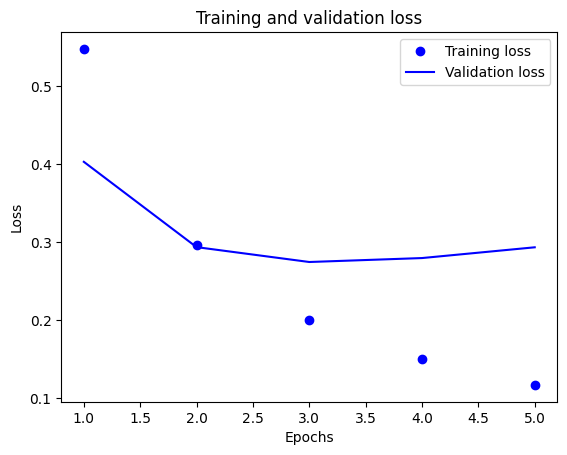

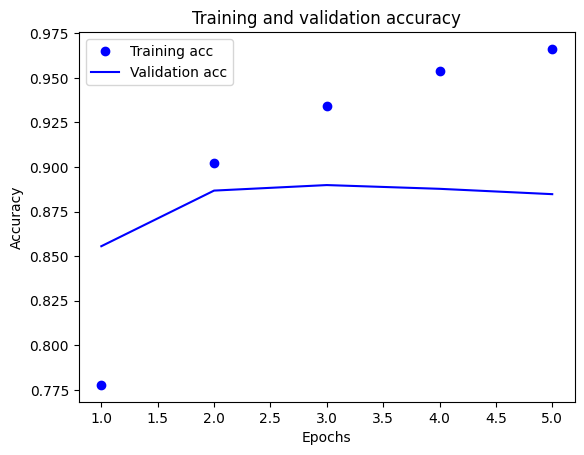

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#this model is used for tuning, so finding optimal parameters

#stacking three models with different activation functions
model = keras.Sequential([
    layers.Dense(16, activation="relu"), #16 neurons
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #choose the last layer on what output you want
])

#Compiling the model

model.compile(optimizer="adam", #how to update the weights after each training step, can also be adam, rmsprop is default learning rate, rms is without momentum
              loss="binary_crossentropy", #loss function
              metrics=["accuracy"])

#Validating your approach

#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training your model

# Create early stopping callback
early_stop = EarlyStopping(
    monitor="val_loss",        # Watch validation loss
    patience=2,                # Stop after 2 epochs without improvement
    restore_best_weights=True # Go back to the best weights
)

#keeps track of the metrics in each epoch
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
#when the optimal parameters are found
# we train the model on the whole training dataset and check the values of the testset
# we are not allowed to look here and change the parameters afterwards, because then we base our model on the testset.
#Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)


print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7304 - loss: 0.5605
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9017 - loss: 0.2951
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2183
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9373 - loss: 0.1812
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8762 - loss: 0.3067
Test Loss: 0.3018
Test Accuracy: 0.8787


# CNN Model

Epoch 1/20


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.5158 - loss: 0.6928 - val_accuracy: 0.7260 - val_loss: 0.6806
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 160ms/step - accuracy: 0.6579 - loss: 0.6580 - val_accuracy: 0.7186 - val_loss: 0.5722
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7357 - loss: 0.5374 - val_accuracy: 0.7910 - val_loss: 0.4556
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.8164 - loss: 0.4174 - val_accuracy: 0.8294 - val_loss: 0.3775
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.8598 - loss: 0.3343 - val_accuracy: 0.8600 - val_loss: 0.3285
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.8969 - loss: 0.2684 - val_accuracy: 0.8742 - val_loss: 0.2969
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.9151 - loss: 0.2247 - val_accuracy: 0.8856 - val_loss: 0.2765
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9384 - loss: 0.1841 - val_acc

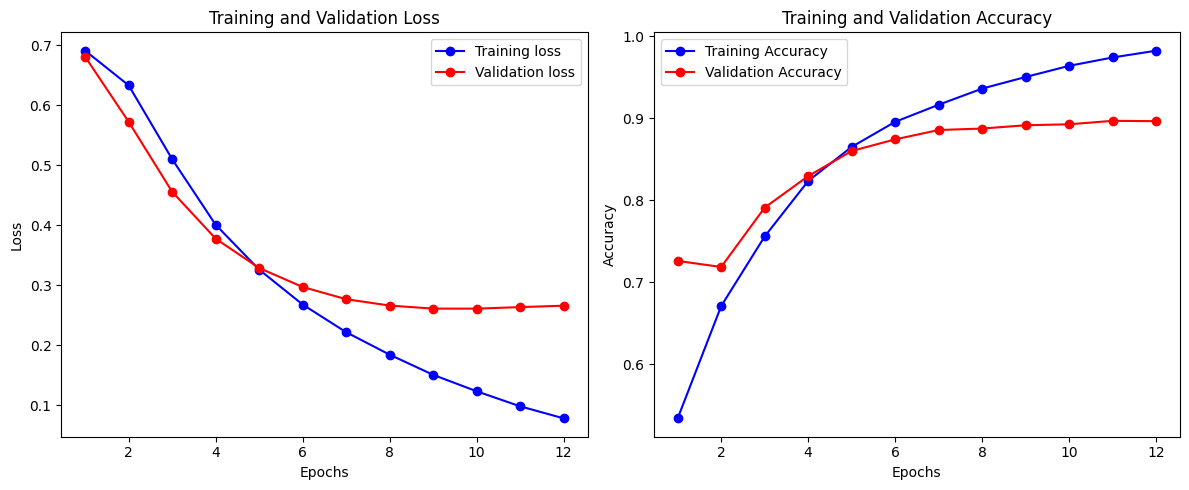

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
F1 Score: 0.8930


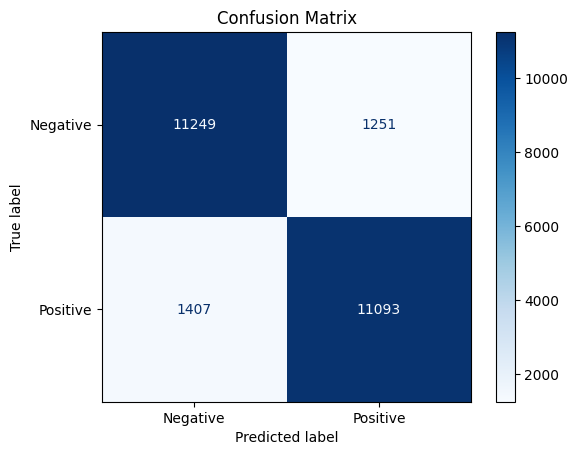

In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score


# Load IMDB data
max_features = 5000  # Vocabulary size
maxlen = 500         # Maximum sequence length

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

# Pad sequences
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = keras.Sequential([
 layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    layers.Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])



# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=20, # Added 10 epochs
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Plot training & validation accuracy and loss
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#Soruce: https://bagheri365.github.io/blog/Sentiment-Analysis-of-IMDB-Movie-Reviews-using-Convolutional-Neural-Network-%28CNN%29-with-Hyperparameters-Tuning/?utm_source=chatgpt.com


## SCORES

# Predict probabilities
y_pred_prob = model.predict(x_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Speech to text


In [12]:
#pip install openai-whisper

In [13]:
#from zipfile import ZipFile  # Make sure to import zipfile

# Unzip
#with ZipFile("Audio_Files.zip", 'r') as zip_ref:
#    zip_ref.extractall("Audio_Files")

# Check files
#import os
#os.listdir("Audio_Files")

In [14]:
import os
import whisper
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.metrics import accuracy_score  # For calculating accuracy


In [15]:
# Initialize the Whisper model
whisper_model = whisper.load_model("base")  # Use your desired model: "base", "small", "medium", or "large"

In [17]:
import pandas as pd

# Path to the 'labels.csv' file
labels_path = 'labels_2.csv'  # Adjust the path if necessary

# Load the labels file
labels_df = pd.read_csv(labels_path)

# Check the first few rows to verify it loaded correctly
print(labels_df.head())

     filename sentiment       emotion  \
0  audio1.m4a  positive      approval   
1  audio2.m4a  negative     annoyance   
2  audio3.m4a  positive  disapproval    
3  audio4.m4a  positive     gratitude   
4  audio5.m4a  positive     curiosity   

                                                text  
0  That was a fantastic presentation. I'm really ...  
1  I cannot believe this is happening again. It i...  
2   I really don't think this is the right decision.  
3  Thank you so much for your help. I truly appre...  
4  I wonder how that works. I'd love to know more...  


In [18]:
# creating the tokenizer - Same as the imdb dataset

from keras.datasets import imdb
# Load the original word index
word_index = imdb.get_word_index()

# Shift indices by 3 to reserve special tokens
word_index = {word: (index + 3) for word, index in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

import re

MAX_FEATURES = 5000

def encode_text(text, word_index, maxlen=500):
    # Preprocessing (very basic – adjust as needed)
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    words = text.split()

    encoded = [1]  # <START>
    for w in words:
        idx = word_index.get(w, 2)          # 2 = <UNK>
        if idx >= MAX_FEATURES:             # “cap” the vocab
            idx = 2                         # map to <UNK>
        encoded.append(idx)

    # pad/truncate to exactly your model’s input_length!
    if len(encoded) < maxlen:
        encoded += [0] * (maxlen - len(encoded))
    else:
        encoded = encoded[:maxlen]

    return encoded


my_review = "This movie was surprisingly good and emotional!"
encoded_review = encode_text(my_review, word_index)

print(encoded_review[:20])  # Preview first 20 tokens

[1, 14, 20, 16, 1238, 52, 5, 921, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
import pandas as pd

# Read the CSV file containing the actual sentiments with a different encoding
sentiment_data = pd.read_csv('labels_2.csv')

# Function to get actual sentiment based on the filename
def get_actual_sentiment(filename):
    # Look for the corresponding row for the filename in the CSV file
    row = sentiment_data[sentiment_data['filename'] == filename]
    if not row.empty:
        return row.iloc[0]['sentiment']  # Return the sentiment value from the 'sentiment' column
    return None  # In case the file is not found


# Function to process each audio file
def process_audio(audio_path, audio_file):
    try:
        # Transcribe the audio file using Whisper
        result = whisper_model.transcribe(audio_path)
        transcribed_text = result['text']
        print(f"Transcription for {audio_file}: {transcribed_text}")

        x_input = np.array([encode_text(transcribed_text, word_index)])  # Encode the transcribed text

        # Preprocess the transcribed text for the sentiment analysis model
        # max_features = 5000  # Same vocabulary size as the model
        # maxlen = 500         # Maximum sequence length used in your model

        # tokenizer = Tokenizer(num_words=max_features)
        # tokenizer.fit_on_texts([transcribed_text])  # Fit tokenizer on the transcribed text
        # sequences = tokenizer.texts_to_sequences([transcribed_text])  # Convert text to sequences
        # x_input = pad_sequences(sequences, maxlen=maxlen)  # Pad sequence to required length

        # Run the transcribed text through your sentiment analysis model
        prediction = model.predict(x_input)  # Use the trained Keras sentiment model
        predicted_sentiment = "Positive" if prediction > 0.5 else "Negative"

        # Get the actual sentiment from the CSV file
        actual_sentiment = get_actual_sentiment(audio_file)

        # If actual sentiment is None, it means it's missing or the filenames don't match
        if actual_sentiment is None:
            print(f"Warning: Missing actual sentiment for {audio_file}. Make sure the filename matches the CSV file.")

        # Print the predicted sentiment
        print(f"Predicted Sentiment for {audio_file}: {predicted_sentiment}")

        # Return the transcription, predicted sentiment, and actual sentiment
        return transcribed_text, predicted_sentiment, actual_sentiment
    except Exception as e:
        print(f"Error with Whisper transcription for {audio_path}: {e}")
        return None, None, None

# List to store predicted and actual sentiments for evaluation
predicted_sentiments = []
actual_sentiments = []

# Path to the audio files folder
audio_folder_path = 'Audio_Files/'  # Replace with the actual folder path

# Loop through all audio files in the folder and process them
for audio_file in os.listdir(audio_folder_path):
    if audio_file.endswith(('.mp4','.mp3', '.wav', '.m4a', '.flac')):  # Check for relevant audio file extensions
        audio_path = os.path.join(audio_folder_path, audio_file)
        transcribed_text, predicted_sentiment, actual_sentiment = process_audio(audio_path, audio_file)

        if transcribed_text and predicted_sentiment and actual_sentiment:
            print(f"Audio File: {audio_file} -> Predicted Sentiment: {predicted_sentiment}, Actual Sentiment: {actual_sentiment}")
            # Append the results for accuracy calculation
            predicted_sentiments.append(predicted_sentiment)
            actual_sentiments.append(actual_sentiment)

# Ensure no missing values before calculating accuracy

if predicted_sentiments and actual_sentiments:
    try:
        # Convert both lists to lowercase and strip extra spaces for accurate comparison
        predicted_sentiments_clean = [sentiment.strip().lower() for sentiment in predicted_sentiments]
        actual_sentiments_clean = [sentiment.strip().lower() for sentiment in actual_sentiments]

        # Compute accuracy score (CSV version)
        accuracy = accuracy_score(actual_sentiments_clean, predicted_sentiments_clean)
        print(f"Model Accuracy: {accuracy * 100:.2f}%")
    except ValueError as e:
        print(f"Error in accuracy calculation: {e}")
else:
    print("Error: Missing predictions or actual sentiments, cannot calculate accuracy.")




c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for audio1.m4a:  That was a fantastic presentation. I'm really impressed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Sentiment for audio1.m4a: Positive
Audio File: audio1.m4a -> Predicted Sentiment: Positive, Actual Sentiment: positive
Transcription for audio10.m4a:  After watching the performance, I couldn't help but admire the level of skill and dedication.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Sentiment for audio10.m4a: Positive
Audio File: audio10.m4a -> Predicted Sentiment: Positive, Actual Sentiment: positive
Transcription for audio100.m4a:  It's strange how something so familiar can bring so much sadness when it's gone.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Sentiment for audio100.m4a: Positive
Audio File: audio100.m4a -> Predicted Sentiment: Positive, Actual Sentiment: negative
Transcription for audio101.m4a:  The good bye was hard that I expected.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Sentiment for audio101.m4a: Positive
Audio Fi

In [20]:
# Count the number of positive and negative predictions
positive_count = predicted_sentiments.count("Positive")
negative_count = predicted_sentiments.count("Negative")

# Print the results
print(f"Number of Positive Predictions: {positive_count}")
print(f"Number of Negative Predictions: {negative_count}")

Number of Positive Predictions: 140
Number of Negative Predictions: 65


In [21]:
# save the results to a CSV file in case we want to compare it with the original labels
# import pandas as pd
# results_df = pd.DataFrame({
  #  'Audio File': os.listdir(audio_folder_path),
  #  'Transcribed Text': [process_audio(os.path.join(audio_folder_path, audio_file), audio_file)[0] for audio_file in os.listdir(audio_folder_path)]
# })

In [22]:
# results_df

In [23]:
# results_df.to_csv('transcribed_text.csv', index=False)

# Now run the model for the original script 

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the CSV with both text and labels
data = pd.read_csv('labels_2.csv')

def process_row(raw_text, actual_sentiment):
    # Print the text being processed
    print(f"Text: {raw_text}")

    # Encode the text for your model (use the same encoder as at training time)
    x_input = np.array([encode_text(raw_text, word_index)])

    # Run the sentiment prediction
    prediction = model.predict(x_input)
    predicted_sentiment = "Positive" if prediction > 0.5 else "Negative"

    print(f"Predicted Sentiment: {predicted_sentiment}, Actual Sentiment: {actual_sentiment}\n")
    return predicted_sentiment, actual_sentiment

# Lists to collect for accuracy calculation
predicted_sentiments = []
actual_sentiments = []

# Loop through each row of the DataFrame
for idx, row in data.iterrows():
    raw_text = row['text']
    actual = row['sentiment']
    
    pred, actual = process_row(raw_text, actual)
    predicted_sentiments.append(pred.strip().lower())
    actual_sentiments.append(actual.strip().lower())

# Compute overall accuracy
if predicted_sentiments and actual_sentiments:
    try:
        accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
        print(f"Model Accuracy on labels_2.csv: {accuracy * 100:.2f}%")
    except ValueError as e:
        print(f"Error computing accuracy: {e}")
else:
    print("No predictions or actuals to compare.")

Text: That was a fantastic presentation. I'm really impressed. 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Sentiment: Positive, Actual Sentiment: positive

Text: I cannot believe this is happening again. It is so frustrating.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Sentiment: Positive, Actual Sentiment: negative

Text: I really don't think this is the right decision.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Sentiment: Positive, Actual Sentiment: positive

Text: Thank you so much for your help. I truly appreciate it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Sentiment: Positive, Actual Sentiment: positive

Text: I wonder how that works. I'd love to know more about it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Sentiment: Positive, Actual Sentiment: positive

Text: Oh, I get it now. That was why everything wasn't adding up.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Sentiment: Negative, Actual Sentiment: positive

Text: I'm sure things will get better 

In [27]:
import whisper
import numpy as np
import queue
import threading
import pyaudio
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences


def predict_sentiment(text):
    try:
        x = np.array([encode_text(text, word_index)])
        print(f"[DEBUG] Encoded input shape: {x.shape}")           # DEBUG
        proba = model.predict(x, verbose=0)[0][0]
        print(f"[DEBUG] Model output probability: {proba:.4f}")    # DEBUG
        return "Positive" if proba > 0.5 else "Negative"
    except Exception as e:
        print(f"[ERROR] in predict_sentiment: {e}")
        return "Error"

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 3

p = pyaudio.PyAudio()
audio_queue = queue.Queue()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

def process_audio():
    while True:
        audio_data = audio_queue.get()
        # convert to float32 in [-1,1]
        audio_np = np.frombuffer(audio_data, dtype=np.int16).astype(np.float32) / 32768.0

        # Whisper transcription
        result = whisper_model.transcribe(audio_np, fp16=False)
        text = result["text"].strip()
        if not text:
            continue

        print(f"\nTranscribed: {text}")

        # Sentiment
        sentiment = predict_sentiment(text)
        print(f"Sentiment: {sentiment}")


# start background thread
threading.Thread(target=process_audio, daemon=True).start()

try:
    print("* Recording started — press Ctrl+C to stop")
    while True:
        frames = []
        for _ in range(int(RATE / CHUNK * RECORD_SECONDS)):
            data = stream.read(CHUNK, exception_on_overflow=False)
            frames.append(data)
        audio_queue.put(b"".join(frames))

except KeyboardInterrupt:
    print("\n* Recording stopped")

finally:
    stream.stop_stream()
    stream.close()
    p.terminate()

* Recording started — press Ctrl+C to stop

Transcribed: I'm glad this project is almost done.
[DEBUG] Encoded input shape: (1, 500)
[DEBUG] Model output probability: 0.7956
Sentiment: Positive

* Recording stopped
